Read the `ICTV2015.csv` spreadsheet using pandas.

In [4]:
import pandas as pd
fname = "../data/ICTV2015.csv"

df = pd.read_csv(fname)
df

,Order,Family,Subfamily,Genus,Species,Type Species,Exemplar Accession Number,Exemplar Isolate,Genome Composition,Last Change,MSL of Last Change,Proposal,Taxon History URL
0,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus CP21,0,HE815464,NaN,dsDNA,"Renamed,Moved,",30,2015.025aB.A.v4.phagesp_ren,ICTVonline=20150005
1,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus CP220,1,FN667788,NaN,dsDNA,"Renamed,Moved,",30,2015.025aB.A.v4.phagesp_ren,ICTVonline=20150006
2,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus CPt10,0,FN667789,NaN,dsDNA,"Renamed,Moved,",30,2015.025aB.A.v4.phagesp_ren,ICTVonline=20150007
3,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus IBB35,0,HM246720,NaN,dsDNA,"Renamed,Moved,",30,2015.025aB.A.v4.phagesp_ren,ICTVonline=20150008
4,Caudovirales,Myoviridae,Eucampyvirinae,Cp8virus,Campylobacter virus CP81,1,FR823450,NaN,dsDNA,"Renamed,Moved,",30,2015.025aB.A.v4.phagesp_ren,ICTVonline=20150010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3699,Unassigned,Virgaviridae,NaN,Tobamovirus,Youcai mosaic virus,0,U30944,OSRMV,ssRNA(+),"Moved,",25,2007.036-8P.Virgaviridae,ICTVonline=20154604
3700,Unassigned,Virgaviridae,NaN,Tobamovirus,Zucchini green mottle mosaic virus,0,AJ295949,Type strain K,ssRNA(+),"Moved,",25,2007.036-8P.Virgaviridae,ICTVonline=20154605
3701,Unassigned,Virgaviridae,NaN,Tobravirus,Pea early-browning virus,0,"RNA1 X14006, RNA2 X51828",SP5,ssRNA(+),"Moved,",25,2007.036-8P.Virgaviridae,ICTVonline=20154607
3702,Unassigned,Virgaviridae,NaN,Tobravirus,Pepper ringspot virus,0,"RNA1 L23972, RNA2 X03241",CAM,ssRNA(+),"Moved,",25,2007.036-8P.Virgaviridae,ICTVonline=20154608


What columns do you see in the data?
How many rows are present ?
Using a pandas dataframe, output this information:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704 entries, 0 to 3703
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Order                      3704 non-null   object
 1   Family                     3704 non-null   object
 2   Subfamily                  724 non-null    object
 3   Genus                      3704 non-null   object
 4   Species                    3704 non-null   object
 5   Type Species               3704 non-null   int64 
 6   Exemplar Accession Number  1749 non-null   object
 7   Exemplar Isolate           1474 non-null   object
 8   Genome Composition         3704 non-null   object
 9   Last Change                3704 non-null   object
 10  MSL of Last Change         3704 non-null   int64 
 11  Proposal                   3704 non-null   object
 12  Taxon History URL          3704 non-null   object
dtypes: int64(2), object(11)
memory usage: 376.3+ KB


Can you plot the distribution MSL of last change ?

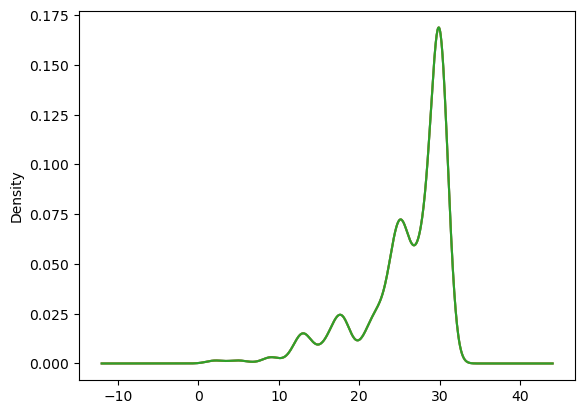

In [16]:
import matplotlib.pyplot as plt
df["MSL of Last Change"].plot(kind="density")
plt.show()

Let's now look at `PDB_data.csv`, containing the number of solved structure by macromolecular type and experimental method: https://www.rcsb.org/stats

In [250]:
fname = "../data/PDB_data.csv"
df = pd.read_csv(fname, thousands=',')
df

,Molecular Type,X-ray,NMR,EM,Multiple methods,Neutron,Other,Total
0,Protein (only),151210,12068,8791,189,72,32,172362
1,Protein/Oligosaccharide,8896,32,1575,6,0,0,10509
2,Protein/NA,7974,280,2774,6,0,0,11034
3,Nucleic acid (only),2524,1431,74,13,2,1,4045
4,Other,154,31,8,0,0,0,193
5,Oligosaccharide (only),11,6,0,1,0,4,22


Can you compute the total number of deposited structures for each method?

In [270]:
# transposes so each row is a unique method, sets data to integer format (transposing makes all cols 'objects')
df2 = df.T.iloc[1:]
df2.loc[:, 0:5] = df2.loc[:, 0:5].astype(int)

# saves Molecular type as the column headers
types = df["Molecular Type"]
df2.columns = types

# creates a sum total column for each method and 
for i in df2.index:
    df2.loc[i, "Method total"] = sum(df2.loc[i, "Protein (only)":"Oligosaccharide (only)"])

df2["Method total"] = df2["Method total"].astype(int)
df2

Molecular Type,Protein (only),Protein/Oligosaccharide,Protein/NA,Nucleic acid (only),Other,Oligosaccharide (only),Method total
X-ray,151210,8896,7974,2524,154,11,170769
NMR,12068,32,280,1431,31,6,13848
EM,8791,1575,2774,74,8,0,13222
Multiple methods,189,6,6,13,0,1,215
Neutron,72,0,0,2,0,0,74
Other,32,0,0,1,0,4,37
Total,172362,10509,11034,4045,193,22,198165


What is the total number of deposited structures?

In [271]:
print ("Total number of structures desposited:", df2.loc["Total", "Method total"])

Total number of structures desposited: 198165


Now let's look at the growth in structures per year and per method, as listed in `PDB_growth.csv`:

In [407]:
fname = "../data/PDB_growth.csv"
df = pd.read_csv(fname, thousands=',')
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              47 non-null     int64  
 1   X-Ray             47 non-null     int64  
 2   NMR               47 non-null     float64
 3   EM                47 non-null     float64
 4   Multiple Methods  47 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 2.0 KB


Can you plot the number of structures deposited per year, for each method? (N.B.: just experimental method, not molecular type, since `PDB_growth.csv` does not contain that information)

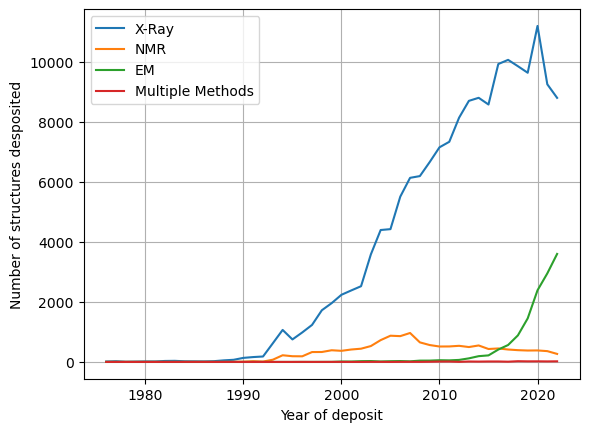

In [316]:
fig, axes = plt.subplots(sharex=True, sharey=True)

axes.plot(df["Year"], df["X-Ray"])
axes.plot(df["Year"], df["NMR"])
axes.plot(df["Year"], df["EM"])
axes.plot(df["Year"], df["Multiple Methods"])
axes.legend(("X-Ray", "NMR", "EM", "Multiple Methods"))
axes.set_xlabel("Year of deposit")
axes.set_ylabel("Number of structures desposited")
axes.grid()
plt.show()

Can you plot the number of structures deposited per year, for each method, but only up to year 2012?

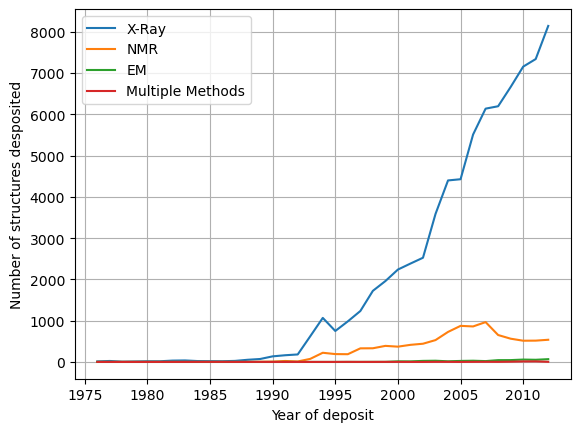

In [317]:
df2 = df[1:]
for i in df2.loc[:, "Year"]:
    if i > 2012:
        df2 = df2[1:]
    else:
        break

fig, axes = plt.subplots(sharex=True, sharey=True)

axes.plot(df2["Year"], df2["X-Ray"])
axes.plot(df2["Year"], df2["NMR"])
axes.plot(df2["Year"], df2["EM"])
axes.plot(df2["Year"], df2["Multiple Methods"])
axes.legend(("X-Ray", "NMR", "EM", "Multiple Methods"))
axes.set_xlabel("Year of deposit")
axes.set_ylabel("Number of structures desposited")
axes.grid()
plt.show()

What method has had the greatest *increase* in deposited models over the last 10 years ? The previous 10 years ?

In [403]:
def increase_calc(df: pd.DataFrame, decade_start: int) -> str:
    """
    Returns the method which had the greatest increase in models deposited in the decade since the specified year.
    """
    # identifies the decade end year and filters dataframe to contain only years in that decade
    try:
        decade_end = decade_start + 10
    except:
        raise ValueError ("Please enter a valid year")
    else:
        df = df[(df["Year"] >= decade_start) & (df["Year"] <= decade_end)]

    # save the difference in models deposited as dictionary (keys = method, values = increase)
    methods = {}
    methods["X_Ray"]    = df.iloc[0, 1] - df.iloc[10, 1]
    methods["NMR"]      = df.iloc[0, 2] - df.iloc[10, 2]
    methods["EM"]       = df.iloc[0, 3] - df.iloc[10, 3]
    methods["Multiple"] = df.iloc[0, 4] - df.iloc[10, 4]
    
    return f"Greatest Increase in deposits for {decade_start} to {decade_end}", max(methods, key = methods.get)

In [409]:
increase_calc(df, 2012)

('Greatest Increase in deposits for 2012 to 2022', 'EM')

In [406]:
increase_calc(df, 2002)

('Greatest Increase in deposits for 2002 to 2012', 'X_Ray')